# Dataset

In [8]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Nama file CSV di dalam dataset
file_path = "heart.csv"

# Load dataset sebagai pandas dataframe
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fedesoriano/heart-failure-prediction",
    file_path
)

<ipython-input-8-dcb3b8942887>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


# Library

In [9]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


# Data Load

In [10]:
# Tampilkan 5 baris pertama
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# Data Understanding

In [11]:
# Cek struktur data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [12]:
# Statistik deskriptif
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [14]:
# Cek distribusi target
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

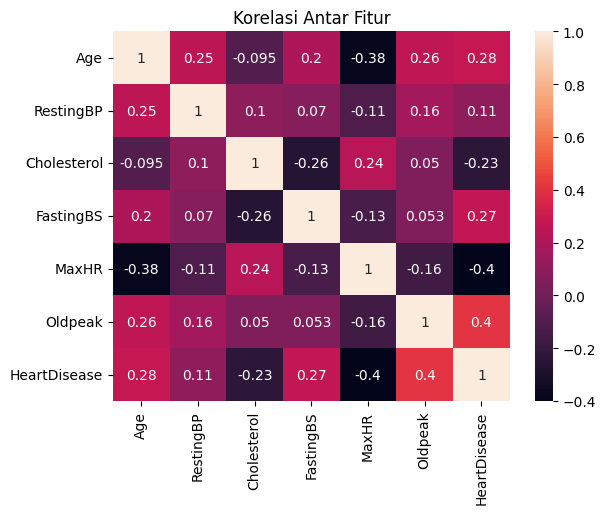

In [15]:
# Korelasi antar fitur numerik
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Korelasi Antar Fitur")
plt.show()


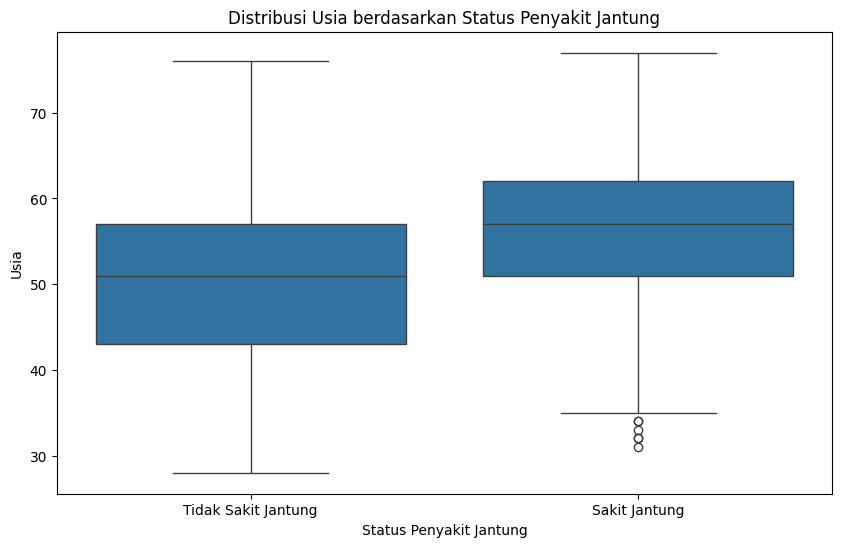

In [17]:
# Distribusi usia berdasarkan status penyakit jantung
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title("Distribusi Usia berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Usia")
plt.show()

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Distribusi Kolesterol berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Kolesterol")
plt.show()

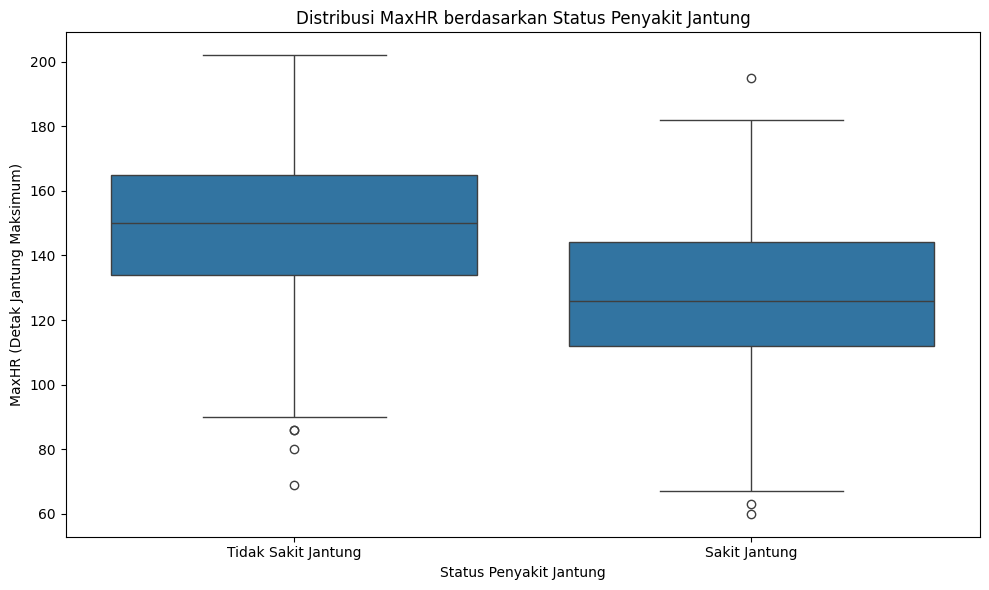

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title("Distribusi MaxHR berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("MaxHR (Detak Jantung Maksimum)")
plt.tight_layout()
plt.show()

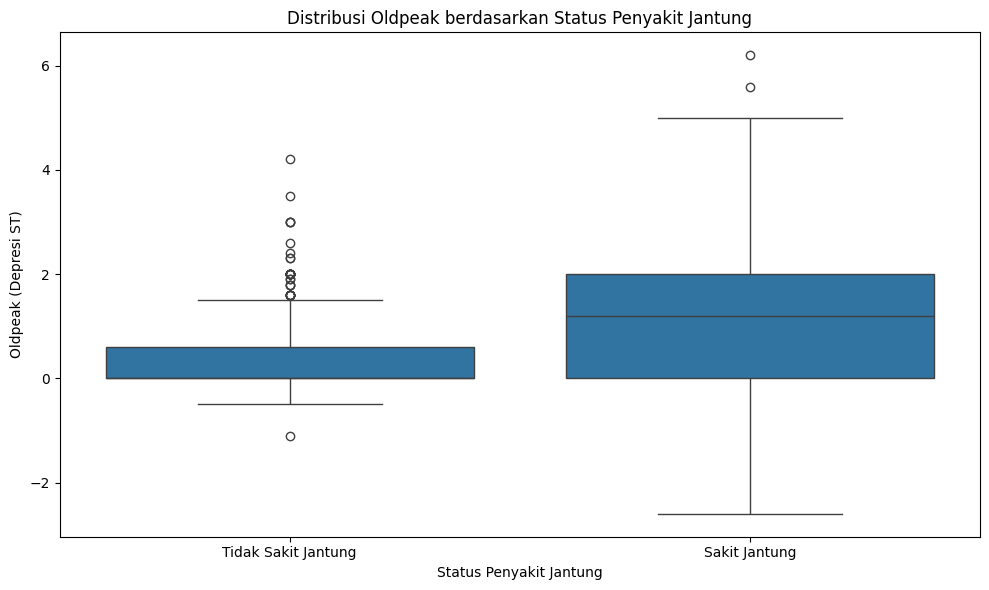

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title("Distribusi Oldpeak berdasarkan Status Penyakit Jantung")
plt.xticks([0, 1], ['Tidak Sakit Jantung', 'Sakit Jantung'])
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Oldpeak (Depresi ST)")
plt.tight_layout()
plt.show()

# Data Preparation

In [21]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [22]:
# One-hot encode fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

In [25]:
# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [26]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Modeling

In [31]:
# ===========================
# 1. Random Forest
# ===========================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)
print("Random Forest Classification Report:")

report_target_names = ['Tidak Sakit Jantung', 'Sakit Jantung']
print(classification_report(y_test, rf_pred, target_names=report_target_names))

Random Forest Accuracy: 0.875
Random Forest Classification Report:
                     precision    recall  f1-score   support

Tidak Sakit Jantung       0.85      0.86      0.85        77
      Sakit Jantung       0.90      0.89      0.89       107

           accuracy                           0.88       184
          macro avg       0.87      0.87      0.87       184
       weighted avg       0.88      0.88      0.88       184



In [30]:
# ===========================
# 2. Decision Tree
# ===========================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree Classification Report:")

print(classification_report(y_test, dt_pred, target_names=report_target_names))

Decision Tree Accuracy: 0.8315217391304348
Decision Tree Classification Report:
                     precision    recall  f1-score   support

Tidak Sakit Jantung       0.79      0.81      0.80        77
      Sakit Jantung       0.86      0.85      0.85       107

           accuracy                           0.83       184
          macro avg       0.83      0.83      0.83       184
       weighted avg       0.83      0.83      0.83       184



In [32]:
# ===========================
# 3. K-Nearest Neighbors
# ===========================
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)
print("KNN Classification Report:")

print(classification_report(y_test, knn_pred, target_names=report_target_names))

KNN Accuracy: 0.8532608695652174
KNN Classification Report:
                     precision    recall  f1-score   support

Tidak Sakit Jantung       0.80      0.87      0.83        77
      Sakit Jantung       0.90      0.84      0.87       107

           accuracy                           0.85       184
          macro avg       0.85      0.86      0.85       184
       weighted avg       0.86      0.85      0.85       184



In [33]:
# Simpan hasil akurasi
model_names = ['Random Forest', 'Decision Tree', 'KNN']
accuracies = [rf_acc, dt_acc, knn_acc]

In [39]:
models_predictions = [
    ("Random Forest", rf_pred),
    ("Decision Tree", dt_pred),
    ("K-Nearest Neighbors (KNN)", knn_pred)
]

## Visualisasi Evaluasi Model


In [34]:
# === 1. Bar Chart Akurasi Tiap Model ===
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Tiap Model")
plt.tight_layout()
plt.show()

<ipython-input-34-d27259835100>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


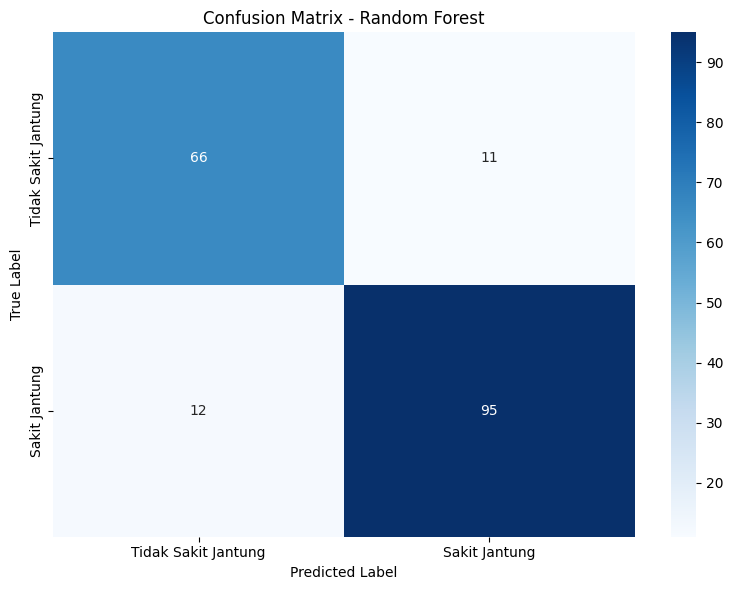

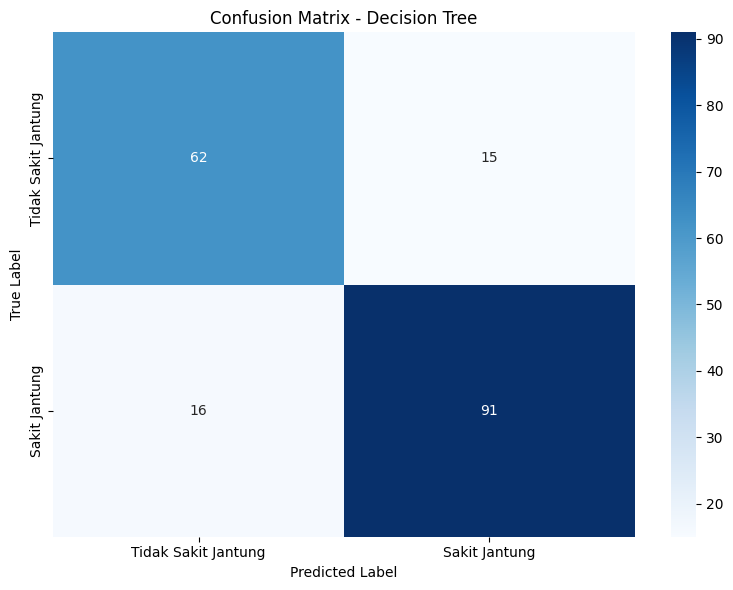

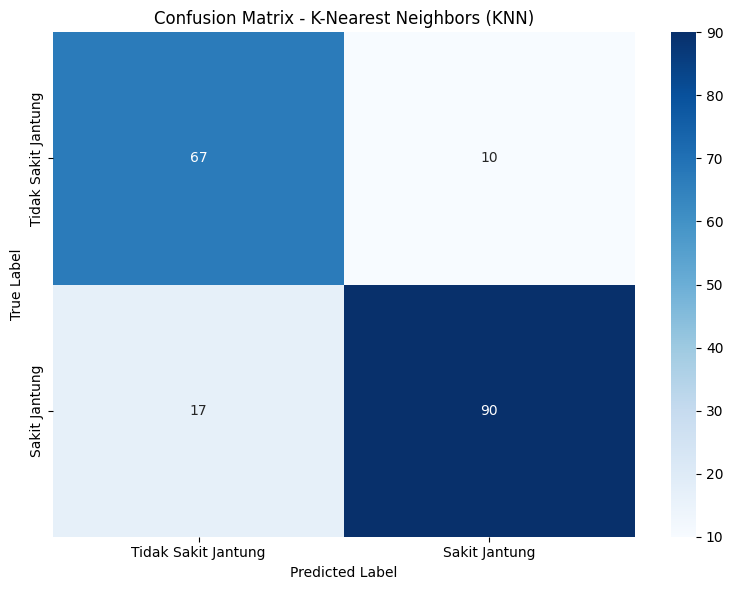

In [40]:
# === 2. Confusion Matrix untuk tiap Model ===
for model_name, y_pred_model in models_predictions:
    cm = confusion_matrix(y_test, y_pred_model)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=report_target_names, yticklabels=report_target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

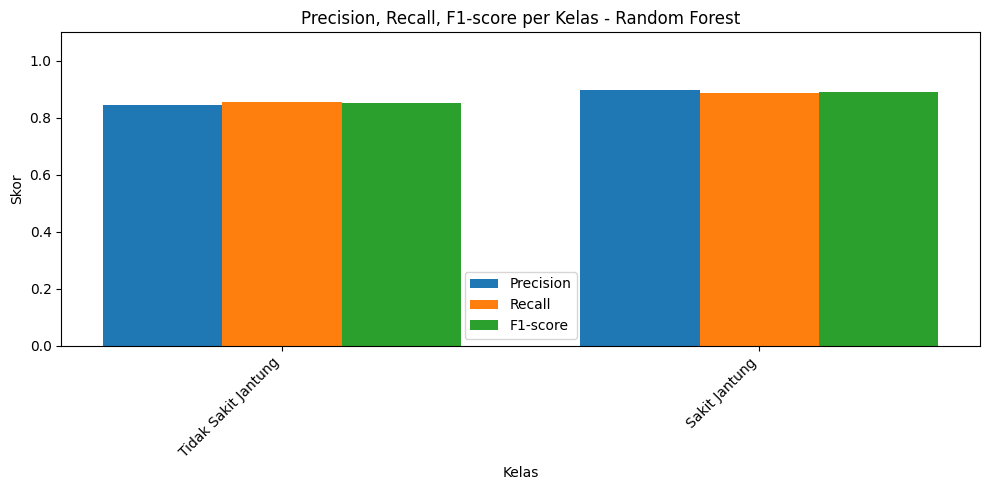

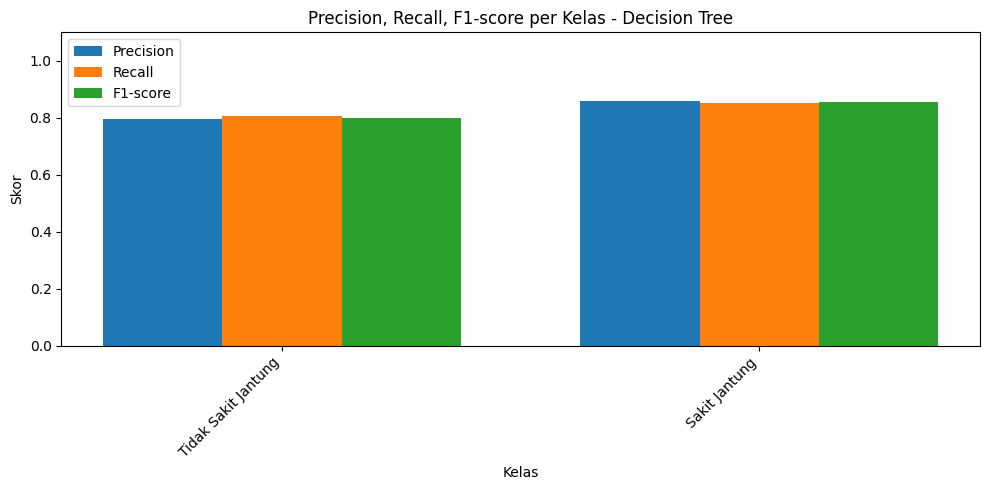

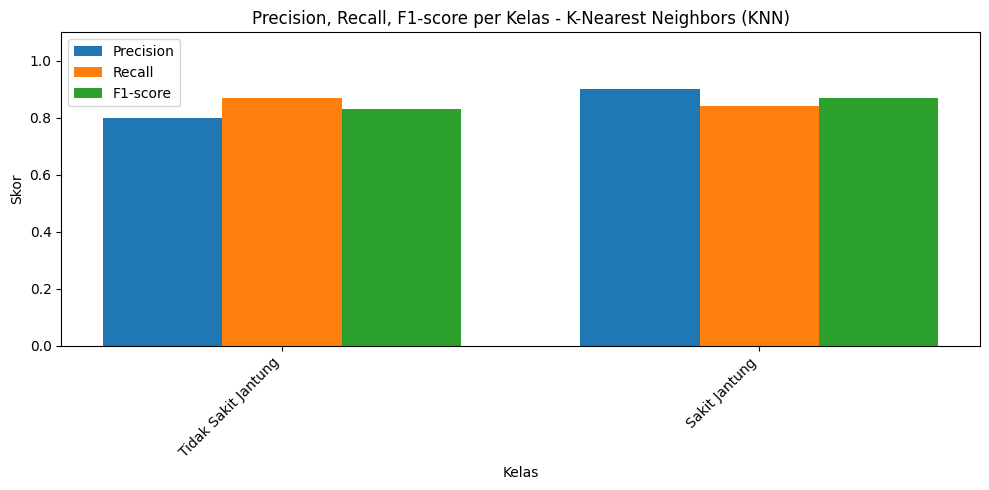

In [41]:
# === 3. Precision, Recall, F1-score per Kelas ===
for model_name, y_pred_model in models_predictions:
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_model, average=None, labels=np.unique(y_encoded))

    x = np.arange(len(report_target_names))

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.25, precision, width=0.25, label='Precision')
    plt.bar(x, recall, width=0.25, label='Recall')
    plt.bar(x + 0.25, f1, width=0.25, label='F1-score')

    plt.xlabel("Kelas")
    plt.ylabel("Skor")
    plt.title(f"Precision, Recall, F1-score per Kelas - {model_name}")
    plt.xticks(x, report_target_names, rotation=45, ha="right")
    plt.ylim(0, 1.1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Hyperparameter Tuning (GridSearchCV) - RandomForest

In [44]:
# Parameter grid yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model dasar
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Jalankan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor validasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Model terbaik untuk prediksi
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)

# Evaluasi
print("Test Set Accuracy (Tuned):", accuracy_score(y_test, best_rf_pred))
print("Classification Report:\n", classification_report(y_test, best_rf_pred, target_names=report_target_names))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.8759947814742335
Test Set Accuracy (Tuned): 0.8641304347826086
Classification Report:
                      precision    recall  f1-score   support

Tidak Sakit Jantung       0.83      0.84      0.84        77
      Sakit Jantung       0.89      0.88      0.88       107

           accuracy                           0.86       184
          macro avg       0.86      0.86      0.86       184
       weighted avg       0.86      0.86      0.86       184



# Hyperparameter Tuning (GridSearchCV) - Decision Tree

In [46]:
# Parameter grid untuk Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model Decision Tree dasar
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt,
                               param_grid=dt_param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2,
                               scoring='accuracy')

dt_grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters (Decision Tree):", dt_grid_search.best_params_)
print("Best Cross-validation Accuracy (DT):", dt_grid_search.best_score_)

# Evaluasi model terbaik
best_dt = dt_grid_search.best_estimator_
dt_tuned_pred = best_dt.predict(X_test)

print("Test Set Accuracy (DT Tuned):", accuracy_score(y_test, dt_tuned_pred))
print("Classification Report (DT Tuned):\n", classification_report(y_test, dt_tuned_pred, target_names=report_target_names))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation Accuracy (DT): 0.8296617277047806
Test Set Accuracy (DT Tuned): 0.8206521739130435
Classification Report (DT Tuned):
                      precision    recall  f1-score   support

Tidak Sakit Jantung       0.76      0.83      0.80        77
      Sakit Jantung       0.87      0.81      0.84       107

           accuracy                           0.82       184
          macro avg       0.82      0.82      0.82       184
       weighted avg       0.82      0.82      0.82       184



# Hyperparameter Tuning (GridSearchCV) - K-Nearest Neighbors (KNN)

In [47]:
# Parameter grid untuk KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Model KNN dasar
knn = KNeighborsClassifier()

# GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn,
                               param_grid=knn_param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2,
                               scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters (KNN):", knn_grid_search.best_params_)
print("Best Cross-validation Accuracy (KNN):", knn_grid_search.best_score_)

# Evaluasi model terbaik
best_knn = knn_grid_search.best_estimator_
knn_tuned_pred = best_knn.predict(X_test)

print("Test Set Accuracy (KNN Tuned):", accuracy_score(y_test, knn_tuned_pred))
print("Classification Report (KNN Tuned):\n", classification_report(y_test, knn_tuned_pred, target_names=report_target_names))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (KNN): {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Cross-validation Accuracy (KNN): 0.8732923306308825
Test Set Accuracy (KNN Tuned): 0.8858695652173914
Classification Report (KNN Tuned):
                      precision    recall  f1-score   support

Tidak Sakit Jantung       0.85      0.88      0.87        77
      Sakit Jantung       0.91      0.89      0.90       107

           accuracy                           0.89       184
          macro avg       0.88      0.89      0.88       184
       weighted avg       0.89      0.89      0.89       184



# Perbandingan Akurasi Model Awal vs Tuned

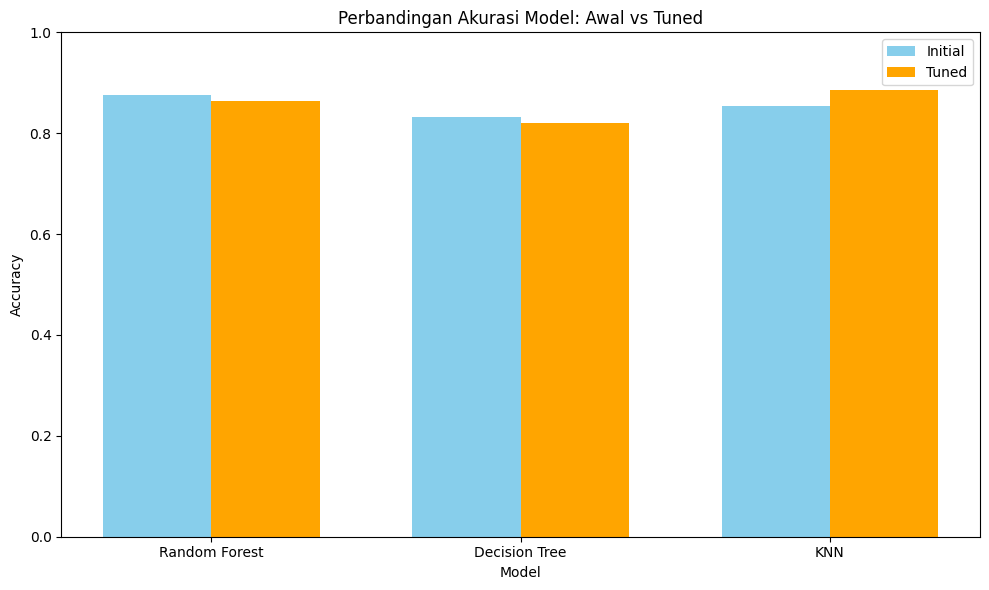

In [48]:
# Akurasi model awal
initial_accuracies = [rf_acc, dt_acc, knn_acc]
# Akurasi model setelah tuning
tuned_accuracies = [
    accuracy_score(y_test, best_rf.predict(X_test)),
    accuracy_score(y_test, best_dt.predict(X_test)),
    accuracy_score(y_test, best_knn.predict(X_test))
]

model_names = ['Random Forest', 'Decision Tree', 'KNN']
x = range(len(model_names))

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(x, initial_accuracies, width=bar_width, label='Initial', color='skyblue')
plt.bar([p + bar_width for p in x], tuned_accuracies, width=bar_width, label='Tuned', color='orange')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model: Awal vs Tuned")
plt.xticks([p + bar_width/2 for p in x], model_names)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix Model Setelah Tuning

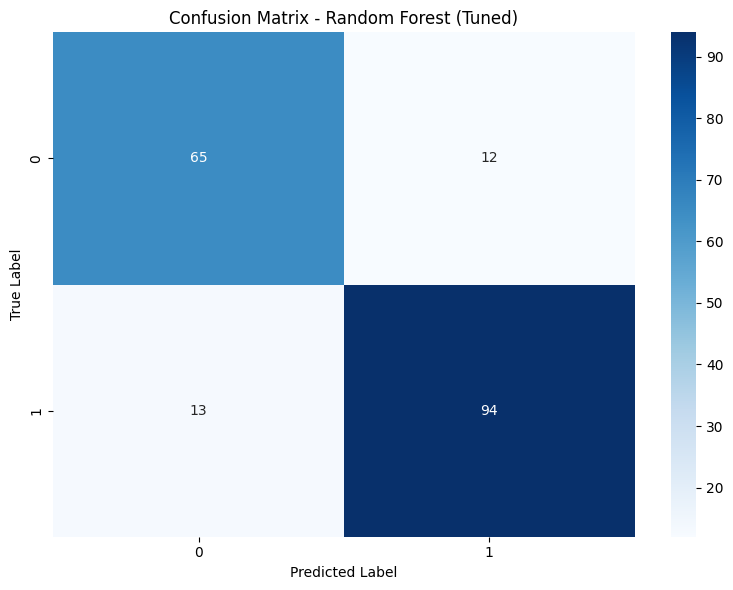

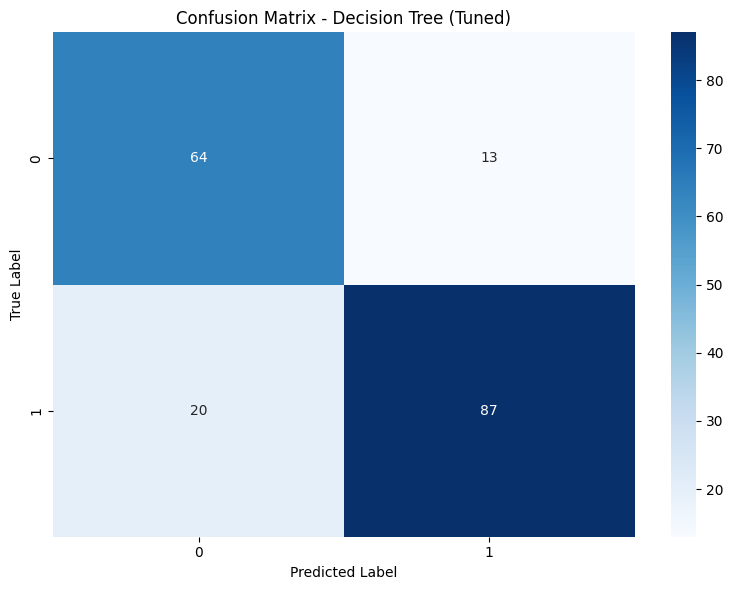

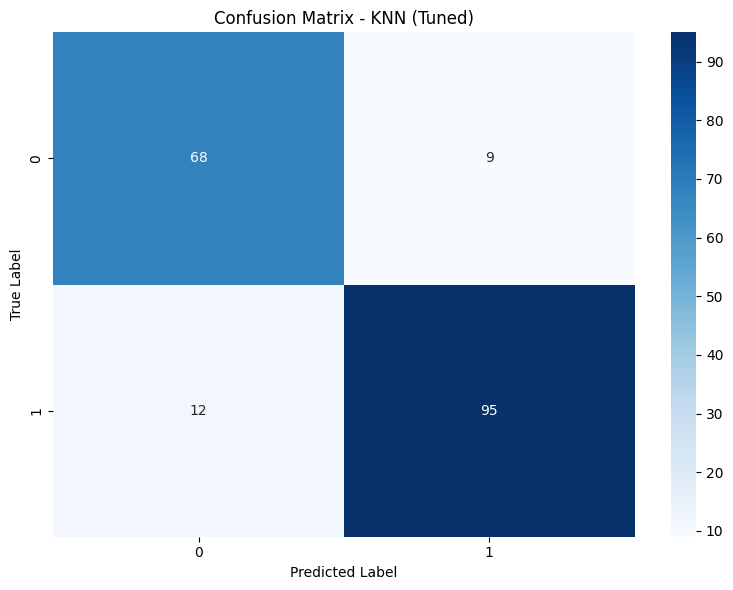

In [49]:
# Daftar model dan hasil prediksi
conf_models = [
    ("Random Forest (Tuned)", best_rf.predict(X_test)),
    ("Decision Tree (Tuned)", best_dt.predict(X_test)),
    ("KNN (Tuned)", best_knn.predict(X_test)),
]

for name, y_pred in conf_models:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()